In [7]:
import pandas as pd
import numpy as np

In [2]:
rfmdf = pd.read_csv('rfm_data.csv')

In [3]:
rfmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [4]:
# Convert PurchaseDate to datetime format.

rfmdf.PurchaseDate = pd.to_datetime(rfmdf.PurchaseDate)

In [8]:
# Calculate Recency
from datetime import datetime

rfmdf['Recency'] = (datetime.now().date()-rfmdf.PurchaseDate.dt.date)/np.timedelta64(1,'D')

In [9]:
rfmdf.Recency.head()

0    148.0
1    148.0
2    148.0
3    148.0
4    148.0
Name: Recency, dtype: float64

In [10]:
# Calculate Frequency

freq_df = rfmdf.groupby('CustomerID')['OrderID'].count().reset_index()

In [11]:
freq_df.head()

,CustomerID,OrderID
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1


In [13]:
freq_df.rename(columns={'OrderID':'Frequency'},inplace = True)

In [17]:
rfmdf = rfmdf.merge(freq_df, on ='CustomerID',how='left')

In [18]:
rfmdf.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,148.0,1
1,2188,2023-04-11,463.70,Product A,176819,London,148.0,1
2,4608,2023-04-11,80.28,Product A,340062,New York,148.0,1
3,2559,2023-04-11,221.29,Product A,239145,London,148.0,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,148.0,1


In [20]:
# Calculate Monetary Value

monetary = rfmdf.groupby('CustomerID')['TransactionAmount'].sum().reset_index()

In [21]:
monetary.rename(columns={'TransactionAmount':'MonetaryValue'},inplace=True)

In [24]:
monetary.head()

,CustomerID,MonetaryValue
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72


In [22]:
rfmdf = rfmdf.merge(monetary, on = 'CustomerID',how = 'left')

In [23]:
rfmdf.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,148.0,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,148.0,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,148.0,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,148.0,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,148.0,1,739.56


In [25]:
# Define Sclaes for RFM Value or RFM Score

recency_scale = [5,4,3,2,1]
frequency_scale = [1,2,3,4,5]
monetary_scale = [1,2,3,4,5]

In [26]:
# Calculate Recency Score
rfmdf['RecencyScore'] = pd.cut(rfmdf.Recency, bins = 5, labels = recency_scale)

In [27]:
rfmdf['FrequencyScale'] = pd.cut(rfmdf.Frequency, bins = 5, labels = frequency_scale)

In [29]:
rfmdf['MonetarySclale'] = pd.cut(rfmdf.MonetaryValue, bins = 5, labels = monetary_scale)

In [33]:
rfmdf.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScale,MonetarySclale
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,148.0,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,148.0,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,148.0,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,148.0,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,148.0,1,739.56,1,1,2


In [34]:
rfmdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   float64       
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   category      
 10  FrequencyScale      1000 non-null   category      
 11  MonetarySclale      1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 81.7+ KB


In [35]:
rfmdf.RecencyScore = rfmdf.RecencyScore.astype(int)
rfmdf.FrequencyScale = rfmdf.FrequencyScale.astype(int)
rfmdf.MonetarySclaswle = rfmdf.MonetarySclale.astype(int)

In [36]:
# Create RFM_Score

rfmdf['RFM_Score'] = rfmdf.RecencyScore + rfmdf.FrequencyScale + rfmdf.MonetarySclale

In [38]:
# Create a New Variable - Customer_Segment
segment_labels = ['Low_Value','Medium_Value','High_Value']
rfmdf['Customer_Segment'] = pd.qcut(rfmdf.RFM_Score, q=3, labels = segment_labels)

In [39]:
rfmdf.rename(columns={'FrequencyScale':'FrequencyScore'},inplace=True)

In [40]:
rfmdf.rename(columns={'MonetarySclale':'MonetaryScore'},inplace=True)

In [41]:
rfmdf.Customer_Segment.value_counts()

Low_Value       435
Medium_Value    386
High_Value      179
Name: Customer_Segment, dtype: int64

In [42]:
rfmdf.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Customer_Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,148.0,1,943.31,1,1,2,4,Low_Value
1,2188,2023-04-11,463.70,Product A,176819,London,148.0,1,463.70,1,1,1,3,Low_Value
2,4608,2023-04-11,80.28,Product A,340062,New York,148.0,1,80.28,1,1,1,3,Low_Value
3,2559,2023-04-11,221.29,Product A,239145,London,148.0,1,221.29,1,1,1,3,Low_Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,148.0,1,739.56,1,1,2,4,Low_Value


In [44]:
rfm_segments = []
for row in rfmdf.RFM_Score:
    if row >= 9:
        rfm_segments.append('Champions')
    elif row >= 6:
        rfm_segments.append('Loyalists')
    elif row >= 5:
        rfm_segments.append('At Risk')
    elif row >= 4:
        rfm_segments.append("Can't Lose")
    else:
        rfm_segments.append('Lost')
        
rfmdf['RFM_Segment'] = rfm_segments

In [45]:
rfmdf.RFM_Segment.value_counts(dropna=False)

Loyalists     503
At Risk       180
Can't Lose    173
Lost           82
Champions      62
Name: RFM_Segment, dtype: int64

In [48]:
rfmdf.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Customer_Segment,RFM_Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,148.0,1,943.31,1,1,2,4,Low_Value,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,148.0,1,463.70,1,1,1,3,Low_Value,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,148.0,1,80.28,1,1,1,3,Low_Value,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,148.0,1,221.29,1,1,1,3,Low_Value,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,148.0,1,739.56,1,1,2,4,Low_Value,Can't Lose


In [49]:
loyal = rfmdf[rfmdf.RFM_Segment == 'Loyalists']

In [50]:
loyal[["Recency","Frequency","MonetaryValue"]].describe()

,Recency,Frequency,MonetaryValue
count,503.000000,503.000000,503.000000
mean,107.351889,1.097416,588.520596
std,13.237240,0.296818,307.554612
min,88.000000,1.000000,21.240000
25%,98.000000,1.000000,327.010000
50%,105.000000,1.000000,626.810000
75%,116.000000,1.000000,828.110000
max,148.000000,2.000000,1820.530000


<Axes: >

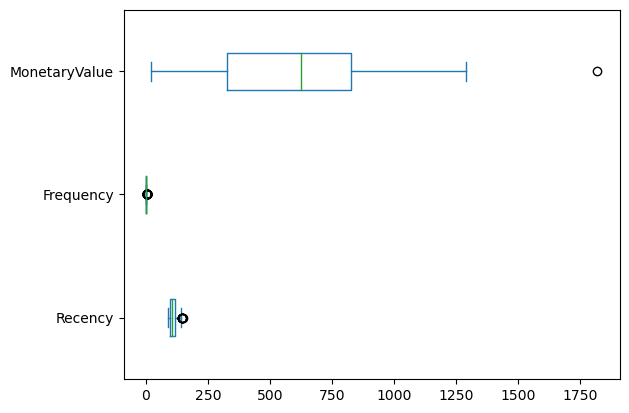

In [52]:
loyal[["Recency","Frequency","MonetaryValue"]].plot(kind='box',vert=False)

In [55]:
# Loyal customers across the cities
loyal.Location.value_counts()

Tokyo       137
New York    134
London      122
Paris       110
Name: Location, dtype: int64

In [56]:
# Overall Customers
rfmdf.Location.value_counts()

Tokyo       278
New York    247
London      246
Paris       229
Name: Location, dtype: int64

In [57]:
pd.crosstab(rfmdf.Location, rfmdf.RFM_Segment)

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Location,,,,,
London,38,52,16,18,122
New York,47,32,15,19,134
Paris,49,41,9,20,110
Tokyo,46,48,22,25,137
